In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/t-bank/invest_db.csv


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
train = pd.read_csv("/kaggle/input/t-bank/invest_db.csv",sep=';', engine='python')
train.head()

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
0,1479787897,2024-04-20,33,NaN,UNM,"0,0","31272,0",2023-09-13,1,0,...,"428,0","0,0","0,0","-11298,0","541,0","0,0","0,0","0,0","0,0","0,0"
1,601760063,2024-02-01,29,GRD,UNM,"0,0","6284,0",2021-03-29,0,0,...,"23,0","0,0","0,0",NaN,"8115,0","0,0","0,0","0,0","0,0","0,0"
2,61175329,2024-02-10,38,SCH,MAR,"0,0","1904,0",2023-12-05,1,0,...,"193,0","0,0","0,0","0,0","25,0",NaN,"0,0","0,0","0,0","2,0"
3,1411700618,2024-03-05,64,NaN,NaN,"0,0",NaN,2021-09-16,0,0,...,"0,0","0,0","0,0",NaN,"65,0",NaN,"0,0","0,0","0,0","0,0"
4,2096755145,2024-02-10,31,NaN,UNM,"0,0",NaN,2022-03-01,0,0,...,"0,0","0,0","0,0","0,0","0,0",NaN,"0,0","0,0","0,0","0,0"


In [23]:
##statistical info
train.describe()

,id,age,forts_flg,margin_status_flg,qualified_investor_flg
count,4.583700e+05,458370.000000,458370.000000,458370.000000,458370.000000
mean,1.062470e+09,40.533674,0.530006,0.322597,0.286797
std,6.192610e+08,10.917544,0.499099,0.467471,0.452266
min,4.239000e+04,18.000000,0.000000,0.000000,0.000000
25%,5.234677e+08,33.000000,0.000000,0.000000,0.000000
50%,1.053416e+09,40.000000,1.000000,0.000000,0.000000
75%,1.613187e+09,47.000000,1.000000,1.000000,1.000000
max,2.147203e+09,86.000000,1.000000,1.000000,1.000000


In [43]:
##datatype info 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        458370 non-null  int64 
 1   date                      458370 non-null  object
 2   age                       458370 non-null  int64 
 3   education_level_cd        458370 non-null  object
 4   marital_status_cd         458370 non-null  object
 5   children_cnt              458370 non-null  object
 6   monthly_income_amt        458370 non-null  object
 7   invest_utilization_dt     458370 non-null  object
 8   forts_flg                 458370 non-null  int64 
 9   margin_status_flg         458370 non-null  int64 
 10  qualified_investor_flg    458370 non-null  int64 
 11  in_payment_rub_amt        458370 non-null  object
 12  out_payment_rub_amt       458370 non-null  object
 13  uncovered_position_amt    458370 non-null  object
 14  turn

In [38]:
train.isnull().sum()

id                          0
date                        0
age                         0
education_level_cd          0
marital_status_cd           0
children_cnt                0
monthly_income_amt          0
invest_utilization_dt       0
forts_flg                   0
margin_status_flg           0
qualified_investor_flg      0
in_payment_rub_amt          0
out_payment_rub_amt         0
uncovered_position_amt      0
turnover_rus_bon_amt        0
turnover_rus_sec_amt        0
turnover_forts_amt          0
turnover_cur_amt            0
turnover_etf_amt            0
turnover_fnd_amt            0
turnover_opt_amt            0
turnover_ore_prc_amt        0
turnover_ore_sel_amt        0
turnover_tracking_amt       0
trade_order_rus_sec_cnt     0
trade_order_rus_bon_cnt     0
trade_order_forts_cnt       0
trade_order_cur_cnt         0
trade_order_etf_cnt         0
trade_order_fnd_cnt         0
trade_order_opt_cnt         0
trade_order_ore_prc_cnt     0
trade_order_ore_sel_cnt     0
trade_orde

<Axes: xlabel='education_level_cd', ylabel='count'>

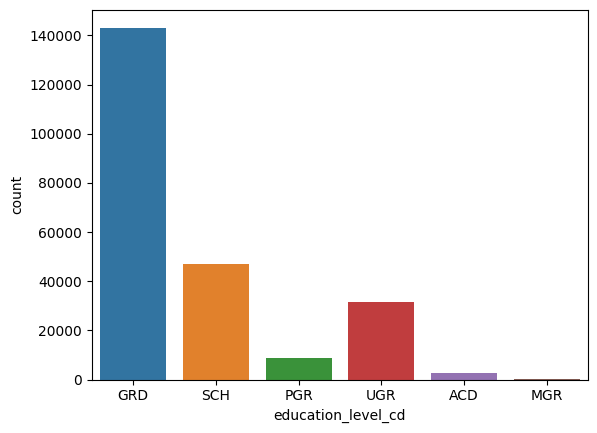

In [26]:
##CATEGORICAL ATTRIBUTES
sns.countplot(train, x="education_level_cd")

<Axes: xlabel='marital_status_cd', ylabel='count'>

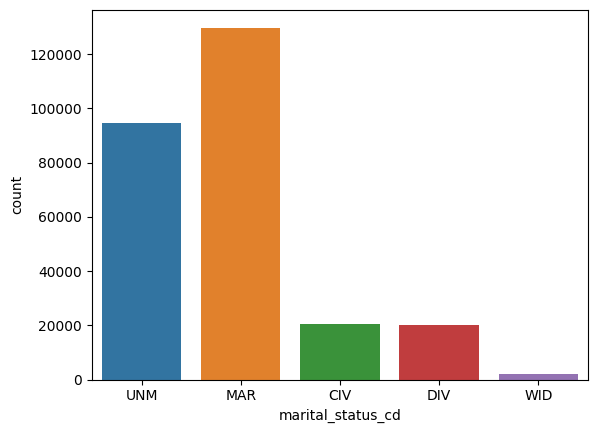

In [27]:
sns.countplot(train, x="marital_status_cd")

<Axes: xlabel='age', ylabel='Density'>

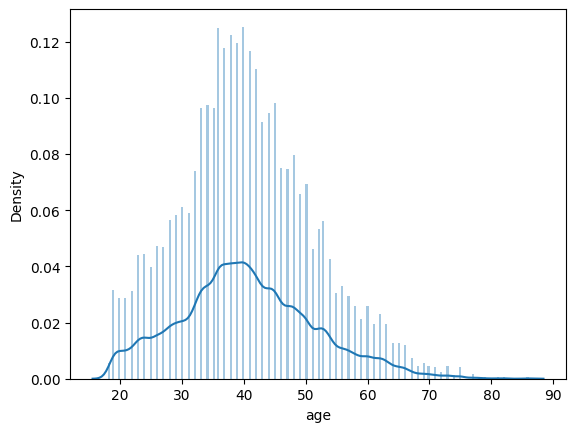

In [28]:
sns.distplot(train['age'],bins = 200)

In [29]:
train['ccr_balance_amt'] = train['ccr_balance_amt'].fillna(0)
train['lon_balance_amt'] = train['lon_balance_amt'].fillna(0)
train['cor_balance_amt'] = train['cor_balance_amt'].fillna(0)

In [30]:
social_cols = ['posts', 'comments', 'reacts', 'reads']
train[social_cols] = train[social_cols].fillna(0)

In [31]:
train['marital_status_cd'] = train['marital_status_cd'].fillna(-1)

In [32]:
train['children_cnt'] = train['children_cnt'].fillna(-1)

In [33]:
train["education_level_cd"] = train["education_level_cd"].fillna(-1)

In [34]:
print(train['monthly_income_amt'].dtype)
print(train['monthly_income_amt'].head(10))

object
0    31272,0
1     6284,0
2     1904,0
3        NaN
4        NaN
5     3158,0
6     2690,0
7     5020,0
8     1595,0
9    16898,0
Name: monthly_income_amt, dtype: object


In [35]:
train['monthly_income_amt'] = (
    train['monthly_income_amt']
    .astype(str)
    .str.replace(' ', '')
    .str.replace(',', '')
    .str.replace('руб', '')
    .str.replace('$', '')
    .replace('nan', '')
)

In [36]:
print(train['monthly_income_amt'] )

0         312720
1          62840
2          19040
3               
4               
           ...  
458365          
458366     25240
458367     62670
458368     47130
458369     14360
Name: monthly_income_amt, Length: 458370, dtype: object


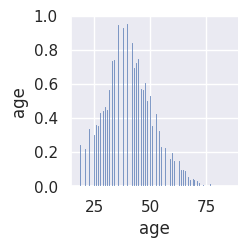

In [41]:
sns.set()
cols = ['age', 'marital_status_cd', 'monthly_income_amt', 'education_level_cd']
sns.pairplot(train[cols], size = 2.5)
plt.show();

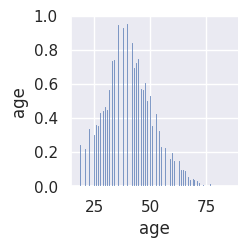